In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


In [112]:
df=pd.read_csv('Life Expectancy Data.csv')

In [113]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Exploratory Data Analysis



In [114]:
print('No. of rows:',df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 2938
No. of columns: 22


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [116]:
df.describe().T # T means transpose (rows become columns and columns become rows)

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

## Data Cleaning

In [117]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### As the number of Missing Values is large I will use Imputing Method to fill null values with mean Value


In [118]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [119]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Handling Outliers

In [120]:
# Loop through each column and create a box plot
for column in df.columns:
    fig = px.box(df, y=column)
    
    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'  
    )
    
    fig.show()


## Second, dealing with outliers

In [121]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])

## Thirdly I will draw boxplot to check outliers after handling it

In [122]:
for column in df.columns:
    fig=px.box(df,y=column,title=f'<b>Box Plot for {column} after handling outliers')

    fig.update_layout(
        title=dict(x=0.5),
        boxmode='group'
    )
    fig.show()


## Data Visualization

In [123]:
# usually plotly draw count for df['year']

fig=px.histogram(df,x='Year',color='Year',title='Count of Records for each Year')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year</b>', x=0.5)
)

fig.show()

In [124]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(df.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country', markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
#update y_axis to maximize the range of age
fig.update_yaxes(range=[df['Life expectancy '].min(),df['Life expectancy '].max()])

fig.show()

In [125]:
#using plotly draw count plot for df['Status'] and color each bar with different color
fig = px.histogram(df, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

## Let's see range of Life expectancy for developing and developed Countries

### Developing Countries

In [126]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developing']

# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()


### Developed Countries

In [127]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developed']

# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

In [128]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for selected numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x='Columns', y='Columns', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='blues',
                title='Heatmap: Correlation Matrix of Numeric Columns')


fig.update_layout(title_text='<b> Heatmap: Correlation Matrix of Numeric Columns </b>', title_x=0.5 ,width=1200 ,height=1200)
fig.show()

### Data Preprocessing

#### Handling Categorical Features (encoding)

In [129]:
df.drop(columns=['Country'],inplace=True)


In [130]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [131]:
# Columns to apply label encoding
cols_to_encode = ['Status']

# Apply label encoding to X
le= LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [132]:
df['Status'].unique()

array([1, 0])

## Splitting Features from Target

In [133]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [134]:
X.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [135]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

## Data Scaling

In [136]:
# Except 'Status' scale  all the columns

cols_to_scale=['Year', 'Adult Mortality', 'infant deaths',
        'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
        'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
        ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
        ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Apply MinMaxScaling to the specified columns

scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])


In [137]:
X

Year  Status  Adult Mortality  infant deaths   Alcohol  \
0     1.000000       1         0.578366       0.550981  0.000000   
1     0.933333       1         0.596026       0.550981  0.000000   
2     0.866667       1         0.589404       0.550981  0.000000   
3     0.800000       1         0.598234       0.550981  0.000000   
4     0.733333       1         0.604857       0.550981  0.000000   
...        ...     ...              ...            ...       ...   
2933  0.266667       1         0.361582       0.490909  0.262523   
2934  0.200000       1         0.361582       0.472727  0.244418   
2935  0.133333       1         0.158940       0.454545  0.266747   
2936  0.066667       1         0.361582       0.454545  0.103199   
2937  0.000000       1         0.361582       0.436364  0.100785   

      percentage expenditure  Hepatitis B  Measles       BMI   \
0                   0.065265     0.150000  1.000000  0.209733   
1                   0.067320     0.075000  0.203340  0.203940   
2                   0.067041     0.125000  0.177716  0.198146   
3                   0.071587     0.200000  1.000000  0.192352   
4                   0.006498     0.225000  1.000000  0.187717   
...                      ...          ...       ...       ...   
2933                0.000000     0.225000  0.012812  0.302433   
2934                0.000000     0.548512  1.000000  0.297798   
2935                0.000000     0.350000  0.125641  0.293163   
2936                0.000000     0.425000  0.218632  0.288528   
2937                0.000000     0.500000  1.000000  0.283893   

      under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0               0.600511  0.657296           0.686949     0.291667   0.000000   
1               0.600511  0.145833           0.688713     0.229167   0.000000   
2               0.600511  0.229167           0.684303     0.270833   0.000000   
3               0.600511  0.333333           0.718695     0.333333   0.000000   
4               0.600511  0.354167           0.661376     0.354167   0.000000   
...                  ...       ...                ...          ...        ...   
2933            0.600000  0.333333           0.596120     0.291667   0.965943   
2934            0.585714  0.657296           0.542328     0.354167   0.965943   
2935            0.571429  0.458333           0.543210     0.416667   0.965943   
2936            0.557143  0.520833           0.510582     0.500000   0.965943   
2937            0.557143  0.562500           0.593474     0.562500   0.965943   

           GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     0.032752    0.408423               0.311823             0.309761   
1     0.034350    0.010490               0.311823             0.309761   
2     0.035421    0.408423               0.311823             0.309761   
3     0.037570    0.118393               0.311823             0.309761   
4     0.003477    0.095388               0.311823             0.309761   
...        ...         ...                    ...                  ...   
2933  0.025449    0.409196               0.611842             0.603896   
2934  0.025392    0.404596               0.638158             0.636364   
2935  0.003130    0.004019               0.072368             0.077922   
2936  0.030746    0.396022               0.098684             0.103896   
2937  0.030677    0.391413               0.717105             0.720779   

      Income composition of resources  Schooling  
0                            0.325180   0.360000  
1                            0.320863   0.353333  
2                            0.312230   0.346667  
3                            0.302158   0.340000  
4                            0.289209   0.320000  
...                               ...        ...  
2933                         0.221583   0.300000  
2934                         0.237410   0.320000  
2935                         0.250360   0.353333  
2936                         0.250360   

## Splitting data into Train Test

In [138]:
X_train,X_test , y_train , y_test =train_test_split(X,y,test_size=.2 ,random_state=42)

In [139]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 20)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 20)
Shape of Y_test is: (588,)


In [140]:
lr=LinearRegression()

In [141]:
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred=lr.predict(X_test)

## Prediction Score

In [143]:

r2 = r2_score(y_test , y_pred)


print("R2 : " ,r2)

R2 :  0.8545300965503067


## Checking for Overfitting OR Underfitting

In [144]:
train_pred= lr.predict(X_train)
test_pred= lr.predict(X_test)

train_score = r2_score(y_train,train_pred)
test_score = r2_score(y_test,test_pred)

print("Train R2 :",train_score)
print("Test R2 :",test_score)

Train R2 : 0.835872187682786
Test R2 : 0.8545300965503067


**This is stable**

## LinearRegression visualization

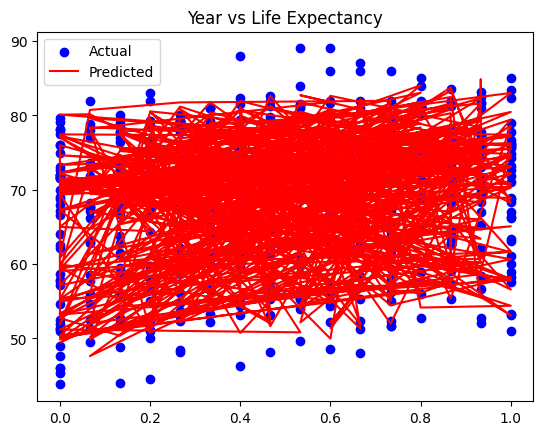

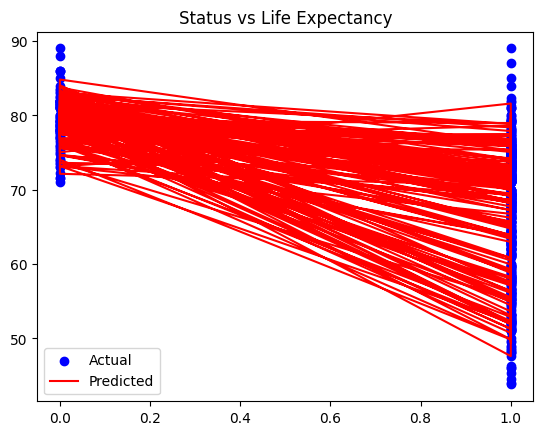

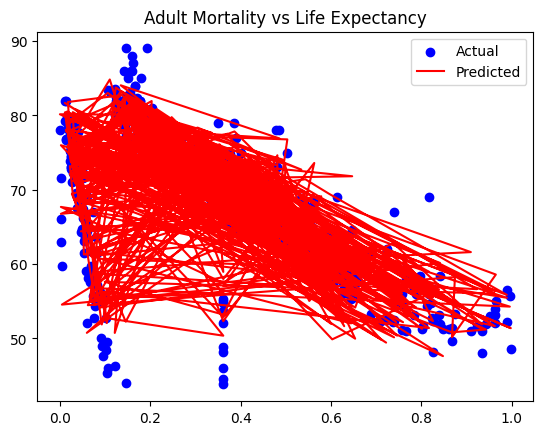

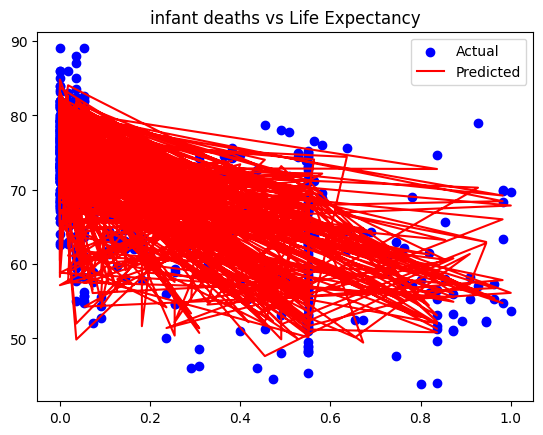

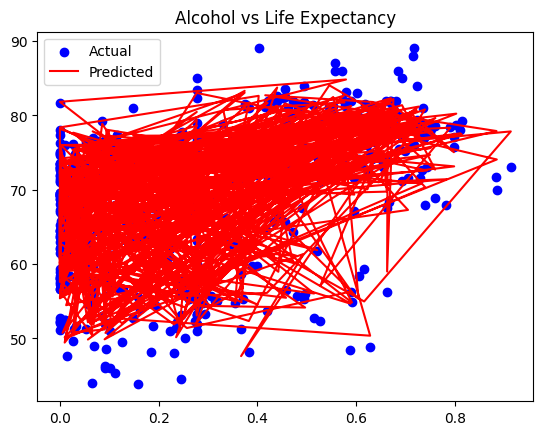

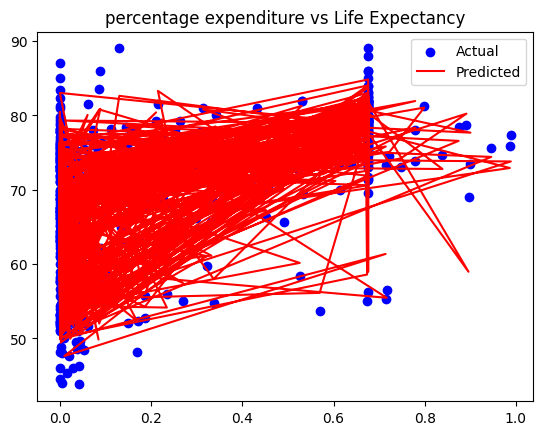

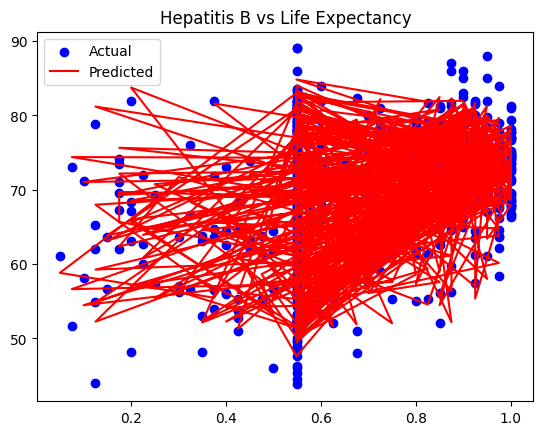

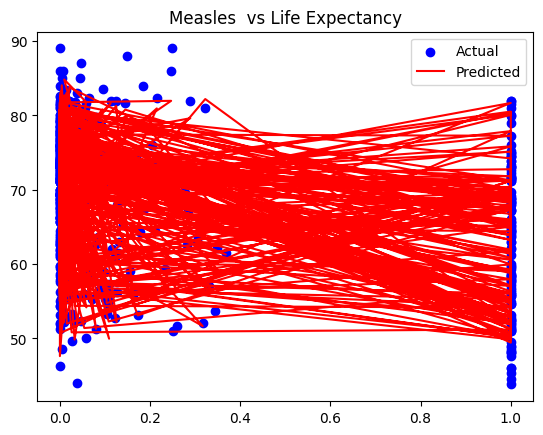

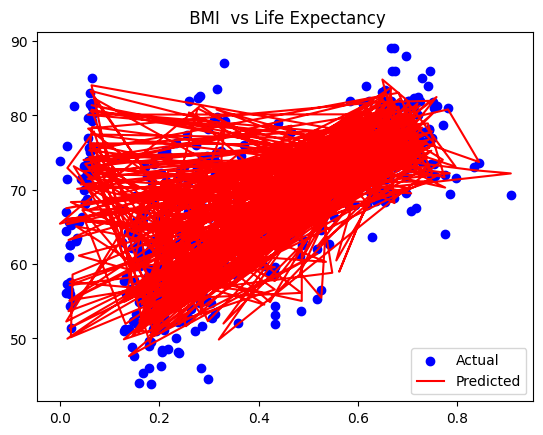

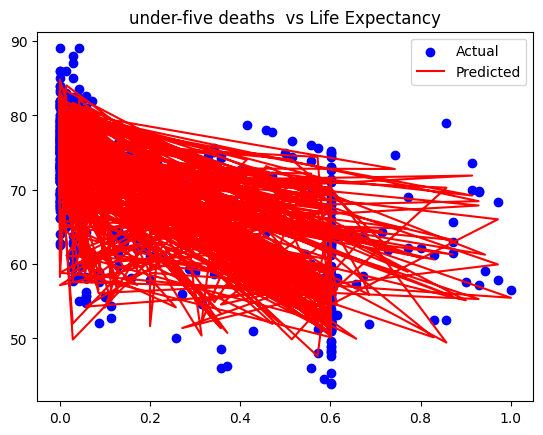

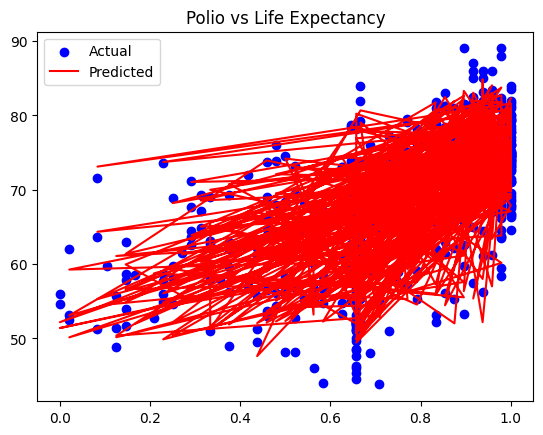

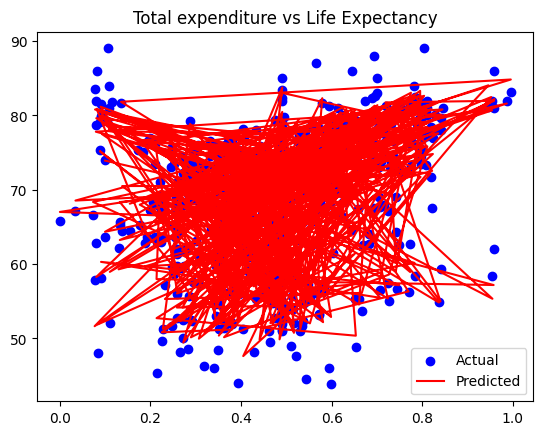

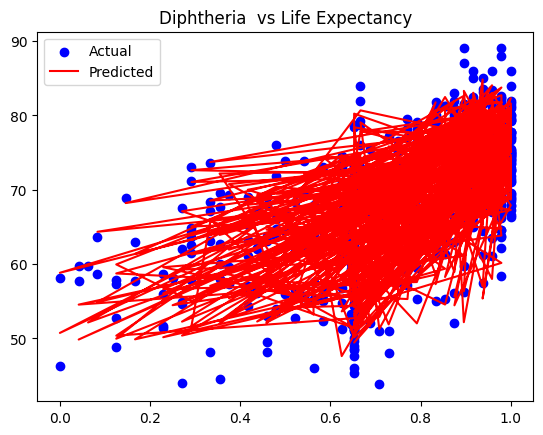

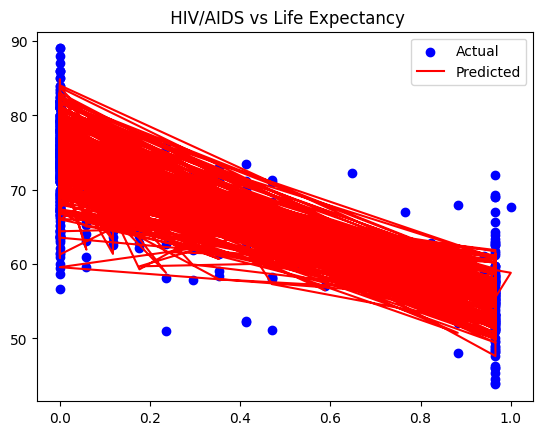

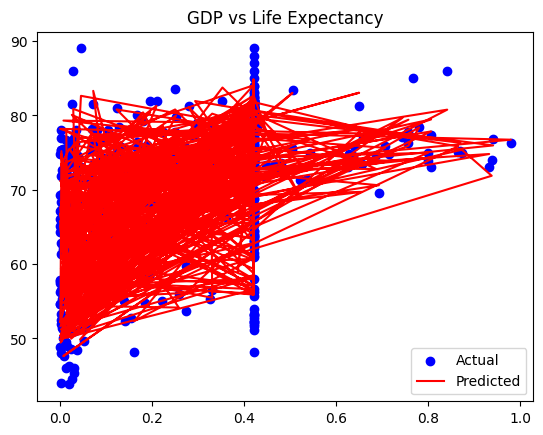

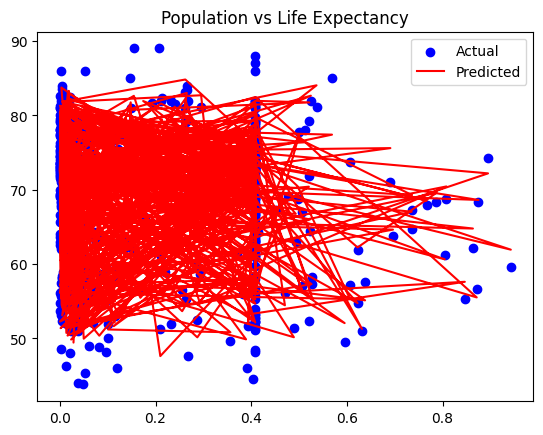

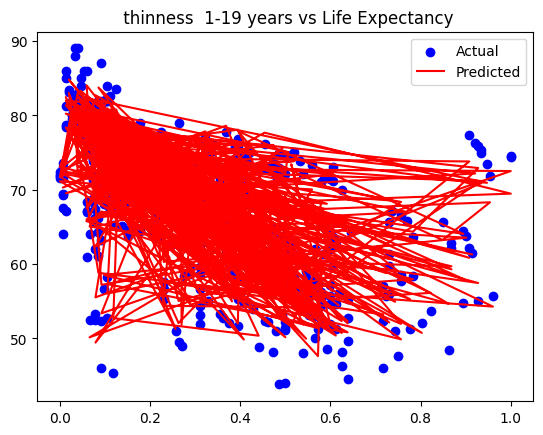

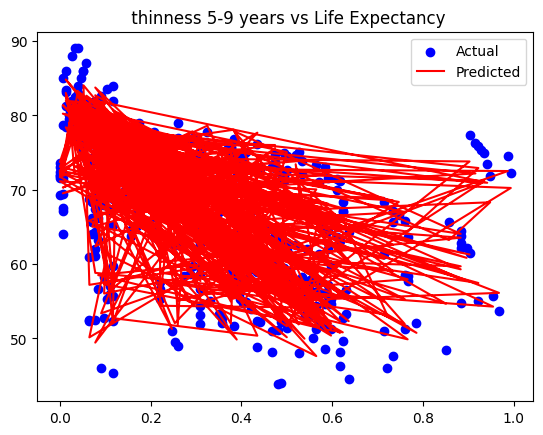

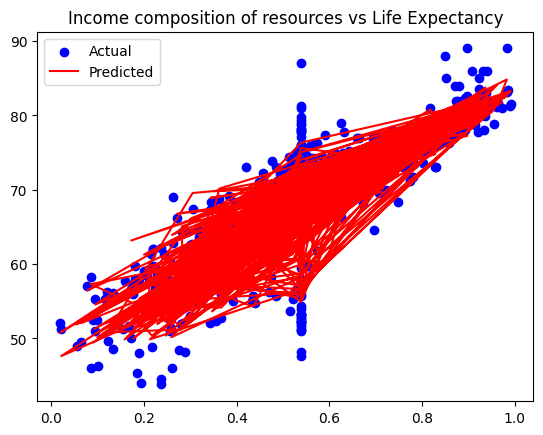

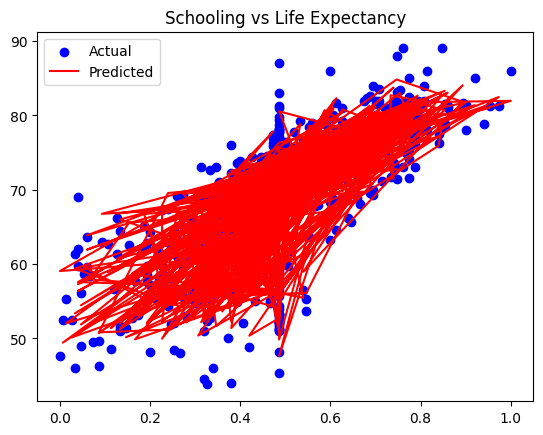

In [145]:
for column in range(0,X_test.shape[1]):

    plt.scatter(X_test.iloc[:,column],y_test,color='blue',label='Actual')
    plt.plot(X_test.iloc[:,column],y_pred,color='red',label='Predicted')
    plt.title(f"{X_test.columns[column] } vs Life Expectancy")
    plt.legend()
    plt.show()